# Dataset
CIFAR dataset contains images in 10 categories:
0-airplanes <br>
1-cars <br>
2-birds <br>
3-cats <br>
4-deer <br>
5-dogs <br>
6-frogs <br>
7-horses <br>
8-ships <br>
9-trucks <br>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Data visualization

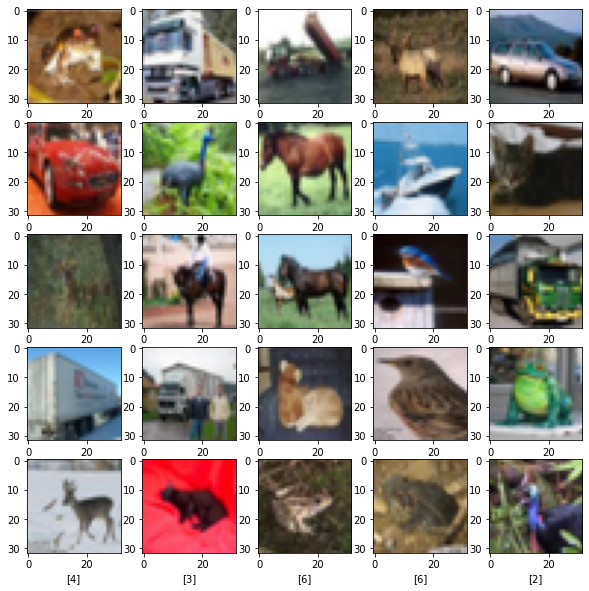

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[start_index+i])
    plt.xlabel(str(y_train[start_index+i]))
plt.show()

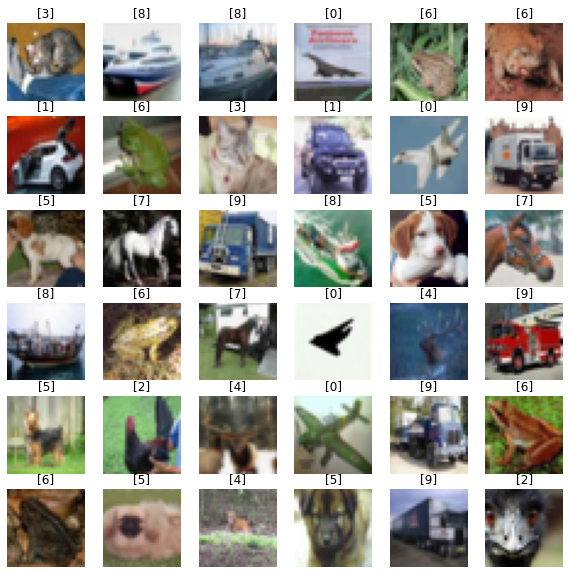

In [5]:
fig, axes = plt.subplots(6,6,figsize=(10,10))
axes = axes.ravel()
for i in range(36):
    axes[i].imshow(x_test[i])
    axes[i].set_title(str(y_test[i]))
    axes[i].axis('off')

# Training

In [6]:
x_train = x_train.astype('float32')
x_train = x_train/255
x_test = x_test.astype('float32')
x_test = x_test/255

In [7]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
x_train.shape[1:]

(32, 32, 3)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.3))

cnn.add(Flatten())

cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.3))

cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [20]:
from tensorflow.keras.optimizers import RMSprop
cnn.compile(
    loss='categorical_crossentropy', 
    optimizer=RMSprop(0.0001, decay=1e-6),
    metrics=['accuracy']
)

In [21]:
history = cnn.fit(x_train, y_train, epochs = 1, batch_size=512)

98/98 [==============================] - 4s 30ms/step - loss: 1.4559 - accuracy: 0.4704


In [22]:
history.history

{'loss': [1.4559274911880493], 'accuracy': [0.47044000029563904]}

In [23]:
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
cnn.save_weights("model.h5")
print("saved model to disk")

saved model to disk


In [26]:
from tensorflow.keras.models import model_from_json

json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
cnn.load_weights("cifar10_trained_model.h5")
print("loaded model from disk")

loaded model from disk


In [27]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [28]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [29]:
cnn.compile(
    loss='categorical_crossentropy', 
    optimizer=RMSprop(0.0001, decay=1e-6),
    metrics=['accuracy']
)

In [30]:
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6917 - accuracy: 0.7712


In [31]:
predicted_classes = cnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predicted_classes.shape

(10000, 10)

In [32]:
predicted_classes

array([[7.52735432e-05, 1.47322717e-03, 9.80149582e-03, ...,
        4.67838690e-04, 2.21026316e-03, 5.45002113e-04],
       [5.11053135e-04, 1.43843598e-03, 2.32146657e-08, ...,
        5.75241188e-10, 9.97894704e-01, 1.55697708e-04],
       [3.95726133e-03, 1.18881892e-02, 1.06147549e-04, ...,
        7.60501962e-06, 9.74000692e-01, 9.97038465e-03],
       ...,
       [2.57443293e-08, 2.47221195e-08, 9.02542233e-05, ...,
        5.69794618e-04, 1.07969015e-07, 6.89600768e-08],
       [1.09294029e-02, 9.80217457e-01, 2.21438403e-03, ...,
        5.34707106e-05, 8.55870458e-05, 1.58488913e-03],
       [1.27285958e-07, 3.27512168e-08, 1.92149546e-05, ...,
        9.89548922e-01, 1.71644032e-07, 1.13096587e-06]], dtype=float32)

In [45]:
import numpy as np
predicted_classes = np.argmax(predicted_classes, axis=1)
# or predicted_classes.argmax(1)

In [46]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [47]:
y_test = np.argmax(y_test, axis=1)

<AxesSubplot:>

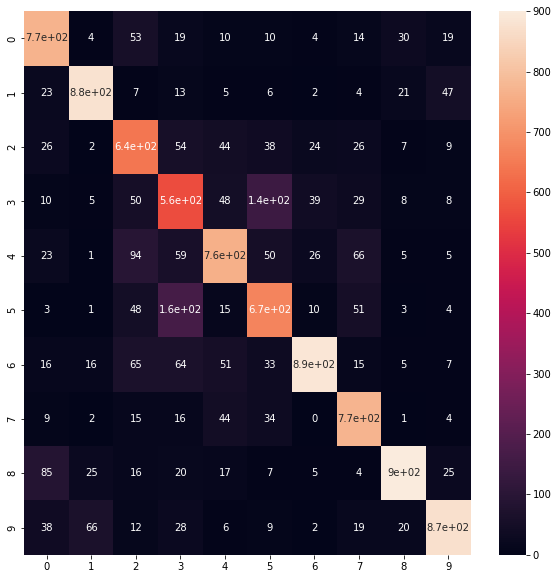

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

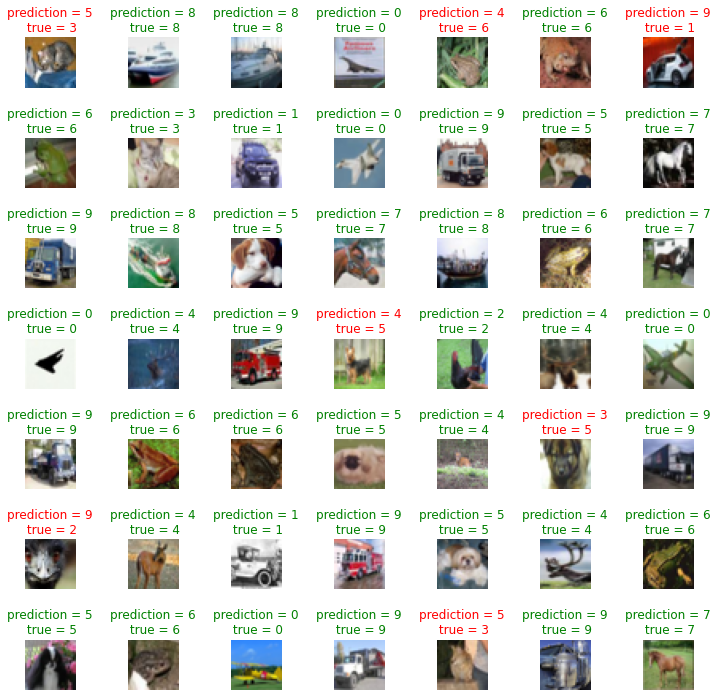

In [59]:
fig, axes = plt.subplots(7,7,figsize=(12,12))
axes = axes.ravel()
for i in range(49):
    if predicted_classes[i] ==y_test[i]:
        c = 'g'
    else:
        c = 'r'
    axes[i].imshow(x_test[i])
    axes[i].set_title("prediction = {}\n true = {}".format(predicted_classes[i], y_test[i]), color=c)
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1, hspace = 1)